In [1]:
# Loading Libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("Wholesale customers data.csv")
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [4]:
sc=StandardScaler()
dfScale=sc.fit_transform(df)

In [10]:
km=KMeans(n_clusters=3,random_state=10)
predicted_clusters=km.fit(dfScale)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
predicted_clusters

KMeans(n_clusters=3, random_state=10)

In [12]:
df["Pred_Clusters"]=predicted_clusters
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Pred_Clusters
0,2,3,12669,9656,7561,214,2674,1338,"KMeans(n_clusters=3, random_state=10)"
1,2,3,7057,9810,9568,1762,3293,1776,"KMeans(n_clusters=3, random_state=10)"


In [13]:
df["Pred_Clusters"].value_counts()

KMeans(n_clusters=3, random_state=10)    440
Name: Pred_Clusters, dtype: int64

In [14]:
dfScale

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [15]:
sse=[]

for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster)
    kmeans.fit(dfScale)
    sse.append(kmeans.inertia_)
    

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [16]:
sse

[3520.0,
 2599.3844237836256,
 2179.9852836883288,
 1851.8408722743848,
 1541.3036147610633,
 1314.8913838359533,
 1173.010555107871,
 1058.6513653915013,
 993.9306850035157,
 919.2777492690948,
 866.3757157621458,
 806.8491800997588,
 746.4631483991134,
 719.9276817188211,
 685.327902238914,
 673.3097989831053,
 639.1859269318325,
 608.3843623072997,
 587.9000963986107]

Text(0, 0.5, 'wcss')

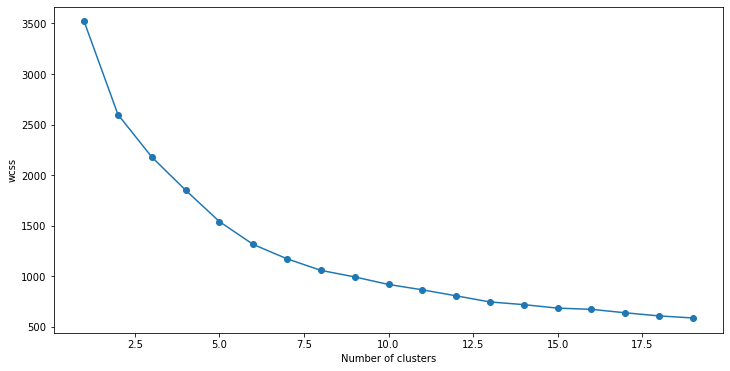

In [21]:
frame=pd.DataFrame({"Cluster":range(1,20),"SSE":sse})
plt.figure(figsize=(12,6))
plt.plot(frame["Cluster"],frame["SSE"],marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")